# Machine Learning with Python Cookbook
# Chapter 20: Neural Networks

## 20.1 Preprocessing Data for Neural Networks

In [1]:
# Load libraries
from sklearn import preprocessing
import numpy as np

In [2]:
%%time
# Create feature
features = np.array([[-100.1, 3240.1],
                     [-200.2, -234.1],
                     [5000.5, 150.1],
                     [6000.6, -125.1],
                     [9000.9, -673.1]])

# Create scaler
scaler = preprocessing.StandardScaler()

# Transform the feature
features_standardized = scaler.fit_transform(features)

# Show feature
features_standardized

Wall time: 1.01 ms


array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [3]:
# Print mean and standard deviation
print("Mean:", round(features_standardized[:,0].mean()))
print("Standard deviation:", features_standardized[:,0].std())

Mean: 0
Standard deviation: 0.9999999999999999


## 20.2 Designing a Neural Network

In [4]:
# Load libraries
from keras import models
from keras import layers

In [5]:
%%time
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

Wall time: 101 ms


## 20.3 Training a Binary Classifier

In [6]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

In [7]:
%%time
# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# Convert movie review data to one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(
    number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

# Train neural network
history = network.fit(features_train, # Features
                      target_train, # Target vector
                      epochs=3, # Number of epochs
                      verbose=1, # Print description after each epoch
                      batch_size=100, # Number of observations per batch
                      validation_data=(features_test, target_test)) # Test data

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

Epoch 1/3
250/250 [==============================] - 2s 6ms/step - loss: 0.5129 - accuracy: 0.7407 - val_loss: 0.3461 - val_accuracy: 0.8518
Epoch 2/3
250/250 [==============================] - 1s 2ms/step - loss: 0.3207 - accuracy: 0.8678 - val_loss: 0.3435 - val_accuracy: 0.8526
Epoch 3/3
250/250 [==============================] - 1s 2ms/step - loss: 0.3034 - accuracy: 0.8730 - val_loss: 0.3275 - val_accuracy: 0.8596
Wall time: 12.3 s


In [8]:
# View shape of feature matrix
features_train.shape

(25000, 1000)

## 20.4 Training a Multiclass Classifier

In [9]:
# Load libraries
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

In [10]:
%%time
# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 5000

# Load feature and target data
data = reuters.load_data(num_words=number_of_features)
(data_train, target_vector_train), (data_test, target_vector_test) = data

# Convert feature data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# One-hot encode target vector to create a target matrix
target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=100,
                         activation="relu",
                         input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=100, activation="relu"))

# Add fully connected layer with a softmax activation function
network.add(layers.Dense(units=46, activation="softmax"))

# Compile neural network
network.compile(loss="categorical_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

# Train neural network
history = network.fit(features_train, # Features
                      target_train, # Target
                      epochs=3, # Three epochs
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(features_test, target_test)) # Test data

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Wall time: 4.61 s


In [11]:
# View target matrix
target_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
target_train.shape

(8982, 46)

## 20.5 Training a Regressor

In [13]:
# Load libraries
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [14]:
%%time
# Set random seed
np.random.seed(0)

# Generate features matrix and target vector
features, target = make_regression(n_samples = 10000,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 0.0,
                                   random_state = 0)

# Divide our data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.33, random_state=0)

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32,
                         activation="relu",
                         input_shape=(features_train.shape[1],)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation="relu"))

# Add fully connected layer with no activation function
network.add(layers.Dense(units=1))

# Compile neural network
network.compile(loss="mse", # Mean squared error
                optimizer="RMSprop", # Optimization algorithm
                metrics=["mse"]) # Mean squared error

# Train neural network
history = network.fit(features_train, # Features
                      target_train, # Target vector
                      epochs=10, # Number of epochs
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(features_test, target_test)) # Test data

Wall time: 1.94 s


## 20.6 Making Predictions

In [15]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

In [16]:
%%time
# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 10000

# Load data and target vector from IMDB movie data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# Convert IMDB data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

# Train neural network
history = network.fit(features_train, # Features
                      target_train, # Target vector
                      epochs=3, # Number of epochs
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(features_test, target_test)) # Test data

# Predict classes of test set
predicted_target = network.predict(features_test)

Wall time: 22.5 s


In [17]:
# View the probability the first observation is class 1
predicted_target[0]

array([0.07869181], dtype=float32)

## 20.7 Visualize Training History

In [18]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

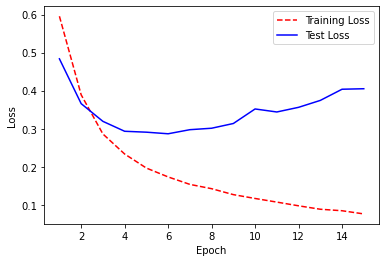

Wall time: 33.2 s


In [19]:
%%time
# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 10000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

# Train neural network
history = network.fit(features_train, # Features
                      target_train, # Target
                      epochs=15, # Number of epochs
                      verbose=0, # No output
                      batch_size=1000, # Number of observations per batch
                      validation_data=(features_test, target_test)) # Test data

# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

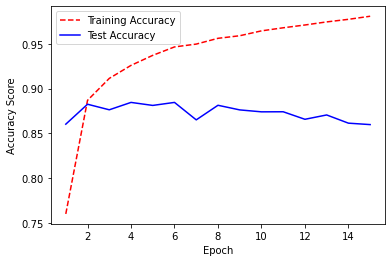

Wall time: 38.6 s


In [20]:
%%time
# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 10000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

# Train neural network
history = network.fit(features_train, # Features
                      target_train, # Target
                      epochs=15, # Number of epochs
                      verbose=0, # No output
                      batch_size=1000, # Number of observations per batch
                      validation_data=(features_test, target_test)) # Test data

# Get training and test accuracy histories
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

## 20.8 Reducing Overfitting with Weight Regularization

In [21]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import regularizers

In [27]:
%%time
# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
                         activation="relu",
                         kernel_regularizer=regularizers.l2(0.01),
                         input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
                         kernel_regularizer=regularizers.l2(0.01),
                         activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

# Train neural network
history = network.fit(features_train, # Features
                      target_train, # Target vector
                      epochs=3, # Number of epochs
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(features_test, target_test)) # Test data

Wall time: 10.4 s


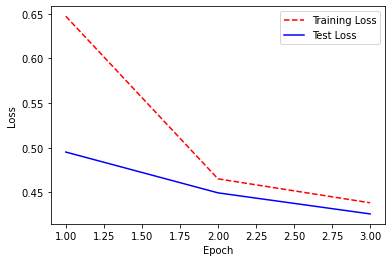

In [28]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

## 20.9 Reducing Overfitting with Early Stopping

In [23]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [29]:
%%time
# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_loss",
                             save_best_only=True)]

# Train neural network
history = network.fit(features_train, # Features
                      target_train, # Target vector
                      epochs=20, # Number of epochs
                      callbacks=callbacks, # Early stopping
                      verbose=0, # Print description after each epoch
                      batch_size=100, # Number of observations per batch
                      validation_data=(features_test, target_test)) # Test data

Wall time: 13.4 s


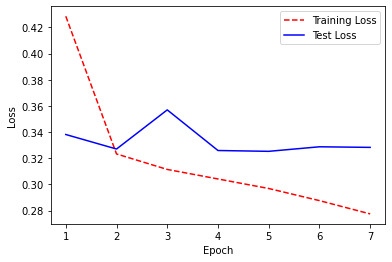

In [30]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

## 20.10 Reducing Overfitting with Dropout

In [25]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

In [31]:
%%time
# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Start neural network
network = models.Sequential()

# Add a dropout layer for input layer
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

# Train neural network
history = network.fit(features_train, # Features
                      target_train, # Target vector
                      epochs=3, # Number of epochs
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(features_test, target_test)) # Test data

Wall time: 11.6 s


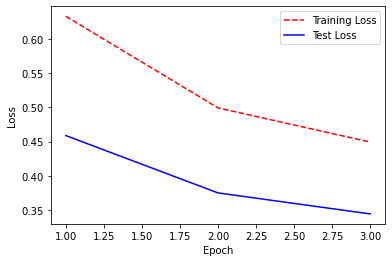

In [32]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

## 12.11 Saving Model Training Progress

In [33]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint

In [34]:
%%time
# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

# Set callback functions to early stop training and save the best model so far
checkpoint = [ModelCheckpoint(filepath="models.hdf5")]

# Train neural network
history = network.fit(features_train, # Features
                      target_train, # Target vector
                      epochs=3, # Number of epochs
                      callbacks=checkpoint, # Checkpoint
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(features_test, target_test)) # Test data

Wall time: 12.4 s


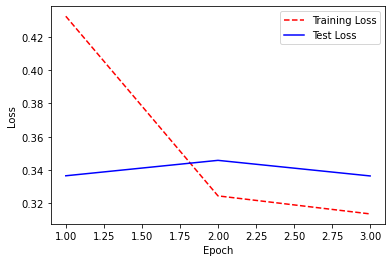

In [35]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

## 20.12 k-Fold Cross-Validating Neural Networks

In [36]:
# Load libraries
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

In [39]:
%%time
# Set random seed
np.random.seed(0)

# Number of features
number_of_features = 100

# Generate features matrix and target vector
features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.5, .5],
                                       random_state = 0)

# Create function returning a compiled network
def create_network():

    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation="relu", input_shape=(
        number_of_features,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation="relu"))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation="sigmoid"))

    # Compile neural network
    network.compile(loss="binary_crossentropy", # Cross-entropy
                    optimizer="rmsprop", # Root Mean Square Propagation
                    metrics=["accuracy"]) # Accuracy performance metric

    # Return compiled network
    return network

# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network,
                                 epochs=10,
                                 batch_size=100,
                                 verbose=0)

# Evaluate neural network using three-fold cross-validation
cross_val_score(neural_network, features, target, cv=5)

Wall time: 7.2 s


array([0.92449999, 0.8725    , 0.91649997, 0.91900003, 0.91350001])

## 20.13 Tuning Neural Networks

In [40]:
# Load libraries
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

In [41]:
%%time
# Set random seed
np.random.seed(0)

# Number of features
number_of_features = 100

# Generate features matrix and target vector
features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.5, .5],
                                       random_state = 0)

# Create function returning a compiled network
def create_network(optimizer="rmsprop"):

    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16,
                             activation="relu",
                             input_shape=(number_of_features,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation="relu"))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation="sigmoid"))

    # Compile neural network
    network.compile(loss="binary_crossentropy", # Cross-entropy
                    optimizer=optimizer, # Optimizer
                    metrics=["accuracy"]) # Accuracy performance metric

    # Return compiled network
    return network

# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, verbose=0)

# Create hyperparameter space
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam"]

# Create hyperparameter options
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

# Create grid search
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)

# Fit grid search
grid_result = grid.fit(features, target)

Wall time: 5min 7s


In [43]:
grid_result

GridSearchCV(estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000022F04B2A7F0>,
             param_grid={'batch_size': [5, 10, 100], 'epochs': [5, 10],
                         'optimizer': ['rmsprop', 'adam']})

In [46]:
# View hyperparameters of best neural network
grid_result.best_params_

{'batch_size': 5, 'epochs': 5, 'optimizer': 'adam'}

## 20.14 Visualizing Neural Networks

In [50]:
# Load libraries
from keras import models
from keras import layers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

Wall time: 160 ms


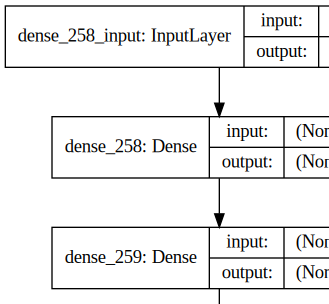

In [57]:
%%time
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Visualize network architecture
SVG(model_to_dot(network, show_shapes=True).create(prog="dot", format="svg"))

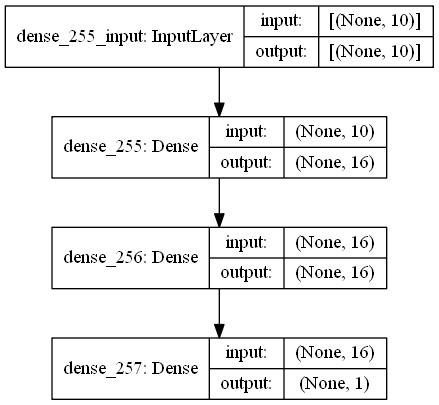

In [54]:
# Save the visualization as a file
plot_model(network, show_shapes=True, to_file="network.png")

Use `model_to_dot` to display a NN in a Jupyter Notebook

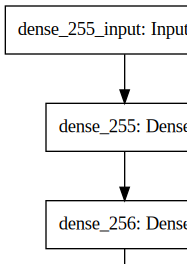

In [55]:
# Visualize network architecture
SVG(model_to_dot(network, show_shapes=False).create(prog="dot", format="svg"))

## 20.15 Classifying Images

In [56]:
# Load libraries
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [69]:
%%time
# Set that the color channel value will be first
K.set_image_data_format("channels_first")

# Set seed
np.random.seed(0)

# Set image information
channels = 1
height = 28
width = 28

# Load data and target from MNIST data
(data_train, target_train), (data_test, target_test) = mnist.load_data()

# Reshape training image data into features
data_train = data_train.reshape(data_train.shape[0], channels, height, width)

# Reshape test image data into features
data_test = data_test.reshape(data_test.shape[0], channels, height, width)

# Rescale pixel intensity to between 0 and 1
features_train = data_train / 255
features_test = data_test / 255

# One-hot encode target
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

# Start neural network
network = Sequential()

# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
network.add(Conv2D(filters=64,
                   kernel_size=(5, 5),
                   input_shape=(channels, width, height),
                   activation='relu'))

# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer
network.add(Dropout(0.5))

# Add layer to flatten input
network.add(Flatten())

# # Add fully connected layer of 128 units with a ReLU activation function
network.add(Dense(128, activation="relu"))

# Add dropout layer
network.add(Dropout(0.5))

# Add fully connected layer with a softmax activation function
network.add(Dense(number_of_classes, activation="softmax"))

# Compile neural network
network.compile(loss="categorical_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

# Train neural network
network.fit(features_train, # Features
            target_train, # Target
            epochs=2, # Number of epochs
            verbose=0, # Don't print description after each epoch
            batch_size=1000, # Number of observations per batch
            validation_data=(features_test, target_test)) # Data for evaluation 

## 20.16 Improving Performance with Image Augmentation

In [70]:
# Load library
from keras.preprocessing.image import ImageDataGenerator

In [72]:
# %%time
# # Create image augmentation
# augmentation = ImageDataGenerator(featurewise_center=True, # Apply ZCA whitening
#                                   zoom_range=0.3, # Randomly zoom in on images
#                                   width_shift_range=0.2, # Randomly shift images
#                                   horizontal_flip=True, # Randomly flip images
#                                   rotation_range=90) # Randomly rotate

# # Process all images from the directory 'raw/images'
# augment_images = augmentation.flow_from_directory("raw/images", # Image folder
#                                                   batch_size=32, # Batch size
#                                                   class_mode="binary", # Classes
#                                                   save_to_dir="processed/images")